In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

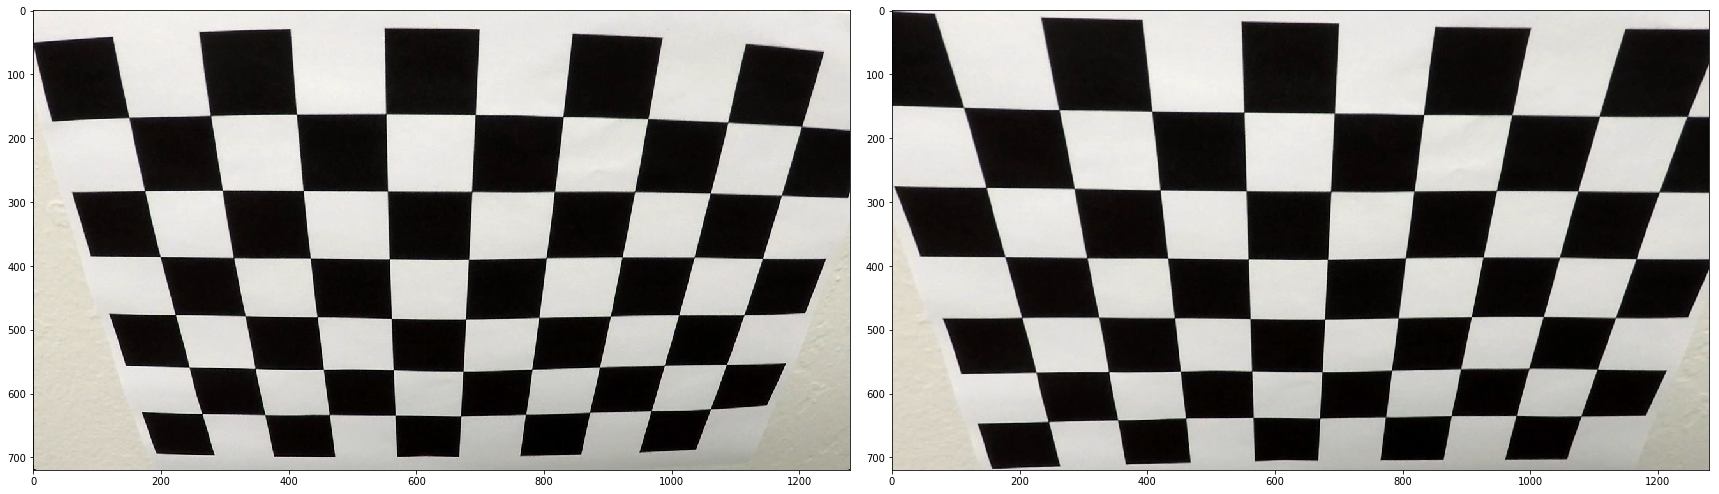

In [2]:
#Camera Calibration - Find Camera Matrix and Distortion Coefficients

#import all images
images = glob.glob('camera_cal/calibration*.jpg')

#create empty arrays to hold object and image points
objpoints = []
imgpoints = []

#prepare object points and initialize as zero/their proper index (0,0,0), (1,0,0), (2,0,0), etc
nx = 9
ny = 6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

#loops through imainges and find corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

#find calibrated values via calibrate function
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

#test image
im1 = mpimg.imread('camera_cal/calibration2.jpg')
undist = cv2.undistort(im1, mtx, dist, None, mtx)
undist2 = cv2.undistort(undist, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(im1)
ax2.imshow(undist)

(720, 1280, 3)


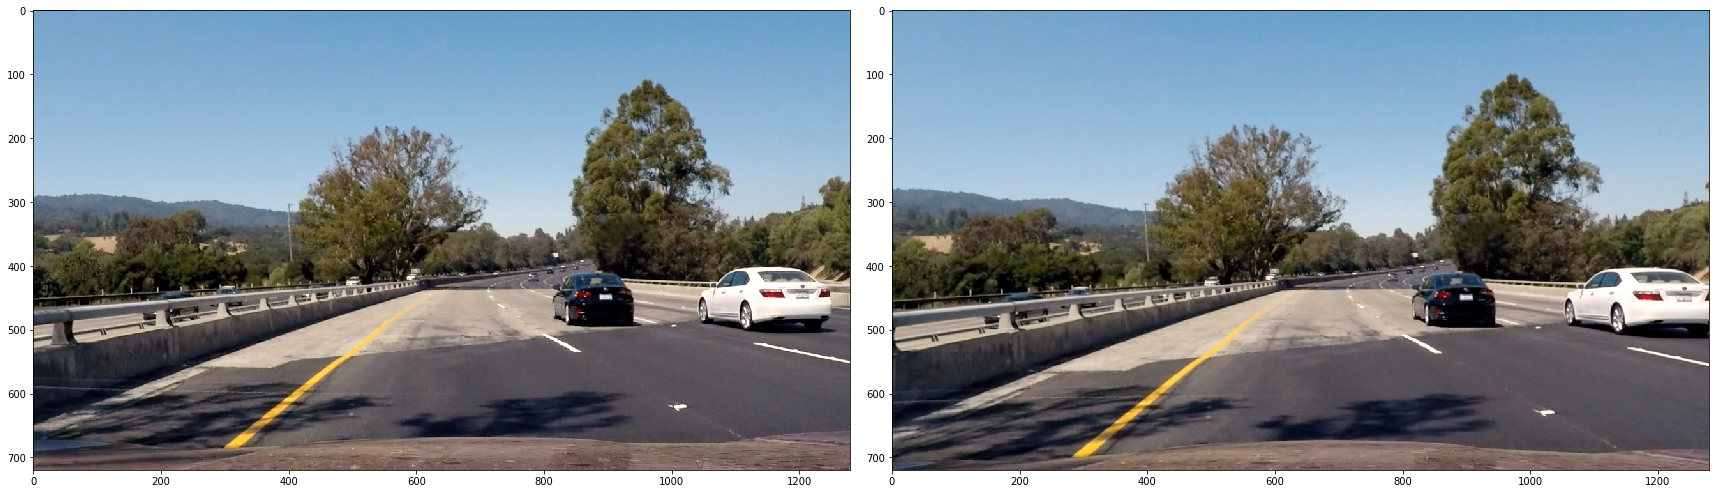

In [101]:
#Apply Distortion Corrections to Raw Images
raw_image_1 = mpimg.imread('test_images/test4.jpg')
raw_undist_1 = cv2.undistort(raw_image_1, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(raw_image_1)
ax2.imshow(raw_undist_1)

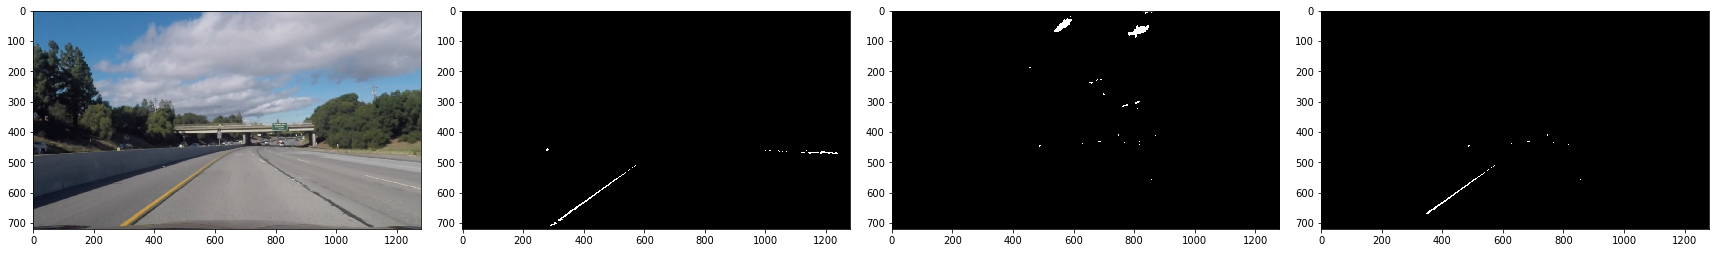

In [104]:
#Create Thresholded Binary Image
raw_image_2 = mpimg.imread('test_images/challenge frame_2.jpg')
raw_undist_2 = cv2.undistort(raw_image_2, mtx, dist, None, mtx)

def create_binary(img):
    #create workign copy
    working_image = np.copy(img)
    imshape = working_image.shape


    #apply RGB threshold
    lower_yellow = np.array([150,150,0])
    upper_yellow = np.array([255,255,130])
    mask_yellow = cv2.inRange(working_image,lower_yellow,upper_yellow)

    lower_white = np.array([200,200,200])
    upper_white = np.array([255,255,255])
    mask_white = cv2.inRange(working_image,lower_white,upper_white)

    combined = mask_yellow + mask_white

    #create and apply mask
    mask = np.zeros_like(combined)
    ignore_mask_color = (255,)*3

    vertices = np.array([[(100,imshape[0]-50),(450, 400), (750, 400), (1200,imshape[0]-50)]], dtype=np.int32)


    cv2.fillPoly(mask, vertices, ignore_mask_color)
    final = cv2.bitwise_and(combined, mask)
    
    return final, mask_yellow, mask_white

yellow = create_binary(raw_undist_2)[1]
white = create_binary(raw_undist_2)[2]
final_combined = create_binary(raw_undist_2)[0]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(raw_undist_2)
ax2.imshow(yellow, cmap='gray')
ax3.imshow(white, cmap='gray')
ax4.imshow(final_combined, cmap='gray')

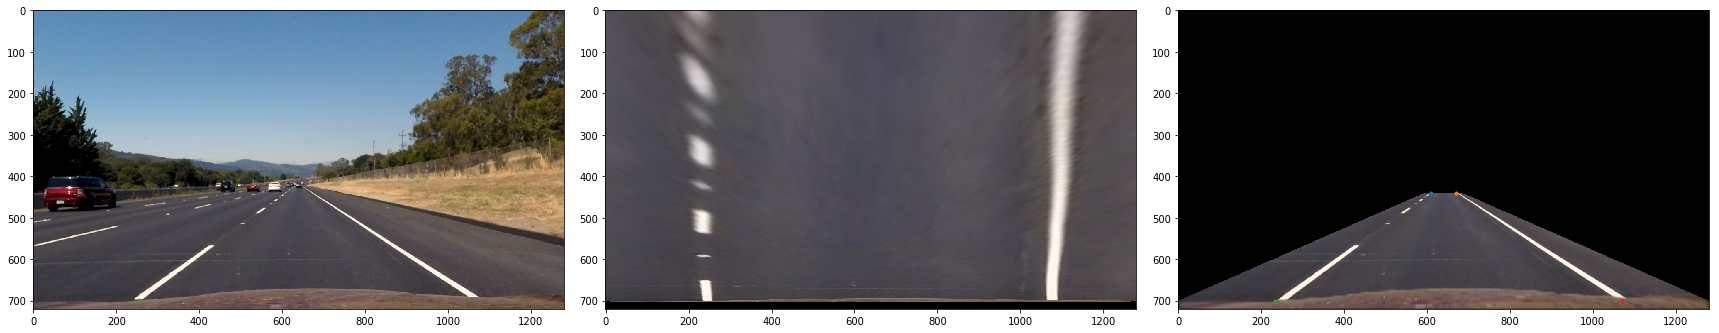

In [5]:
#Apply Perspective Transform

#apply to raw undistorted straight line
def warp_org(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(        
    [[610,440],
    [670,440],
    [233,700],
    [1071,700]])
    
    dst = np.float32(
    [[233,0],
    [1071,0],
    [233,700],
    [1071,700]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped


def reverse_warp_org(img):
    img_size = (img.shape[1], img.shape[0])
    
    dst = np.float32(        
    [[610,440],
    [670,440],
    [233,700],
    [1071,700]])
    
    src = np.float32(
    [[233,0],
    [1071,0],
    [233,700],
    [1071,700]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped


raw_image_3 = mpimg.imread('test_images/straight_lines2.jpg')
raw_undist_3 = cv2.undistort(raw_image_3, mtx, dist, None, mtx)

warped_im_3 = warp_org(raw_undist_3)

resersve_warped_im_3 = reverse_warp_org(warped_im_3)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(raw_undist_3)
ax2.imshow(warped_im_3)
ax3.imshow(resersve_warped_im_3)
plt.plot(610,440, ".")
plt.plot(670,440, ".")
plt.plot(233,700, ".")
plt.plot(1071,700, ".")

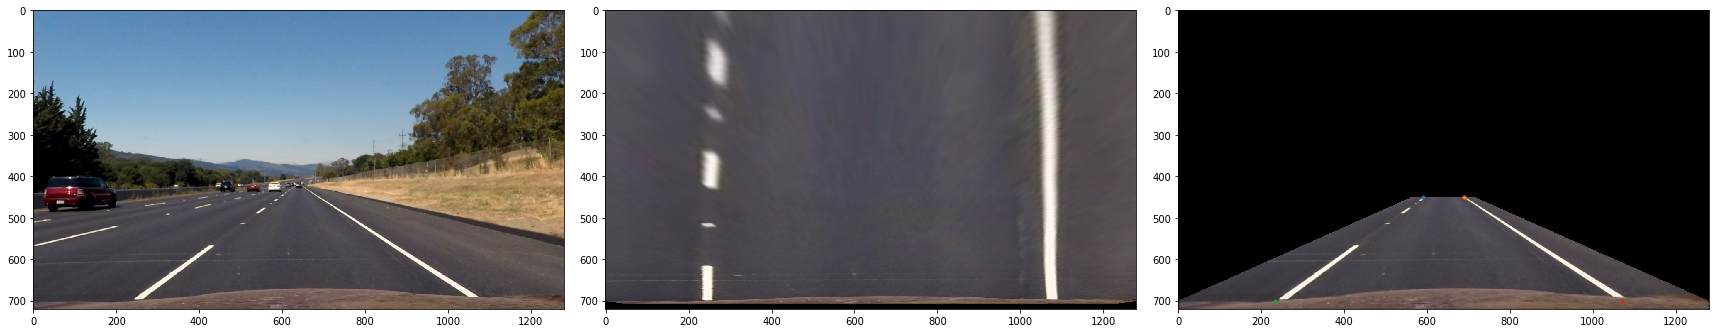

In [6]:
#Apply Perspective Transform

#apply to raw undistorted straight line
def warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(        
    [[590,450],
    [690,450],
    [233,700],
    [1071,700]])
    
    dst = np.float32(
    [[233,0],
    [1071,0],
    [233,700],
    [1071,700]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped


def reverse_warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    dst = np.float32(        
    [[590,450],
    [690,450],
    [233,700],
    [1071,700]])
    
    src = np.float32(
    [[233,0],
    [1071,0],
    [233,700],
    [1071,700]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped


raw_image_3 = mpimg.imread('test_images/straight_lines2.jpg')
raw_undist_3 = cv2.undistort(raw_image_3, mtx, dist, None, mtx)

warped_im_3 = warp(raw_undist_3)

resersve_warped_im_3 = reverse_warp(warped_im_3)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(raw_undist_3)
ax2.imshow(warped_im_3)
ax3.imshow(resersve_warped_im_3)
plt.plot(590,450, ".")
plt.plot(690,450, ".")
plt.plot(233,700, ".")
plt.plot(1071,700, ".")

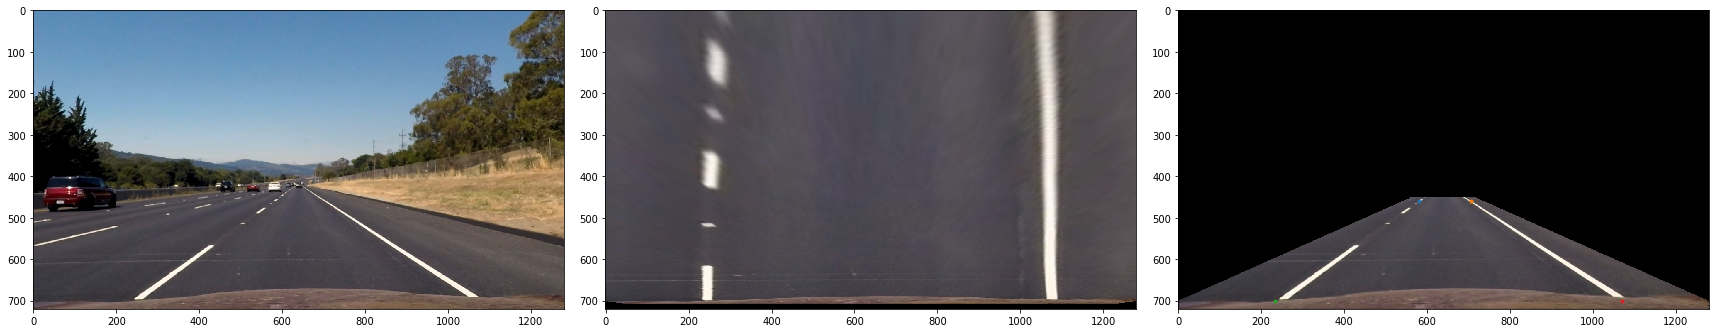

In [7]:
#Apply Perspective Transform

#apply to raw undistorted straight line
def warp_smooth(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(        
    [[580,460],
    [707,460],
    [233,700],
    [1071,700]])
    
    dst = np.float32(
    [[233,0],
    [1071,0],
    [233,700],
    [1071,700]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped


def reverse_warp_smooth(img):
    img_size = (img.shape[1], img.shape[0])
    
    dst = np.float32(        
    [[580,460],
    [707,460],
    [233,700],
    [1071,700]])
    
    src = np.float32(
    [[233,0],
    [1071,0],
    [233,700],
    [1071,700]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped


raw_image_3 = mpimg.imread('test_images/straight_lines2.jpg')
raw_undist_3 = cv2.undistort(raw_image_3, mtx, dist, None, mtx)

warped_im_3 = warp(raw_undist_3)

resersve_warped_im_3 = reverse_warp(warped_im_3)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(raw_undist_3)
ax2.imshow(warped_im_3)
ax3.imshow(resersve_warped_im_3)
plt.plot(580,460, ".")
plt.plot(707,460, ".")
plt.plot(233,700, ".")
plt.plot(1071,700, ".")

In [8]:
def find_lane_pixels(binary_warped):

    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 7
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty

In [9]:
def search_around_poly(binary_warped, leftx_r, lefty_r, rightx_r, righty_r):
    margin = 50
    
    global line1

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    if ((len(leftx_r) == 0) or (len(lefty_r) == 0) or (len(rightx_r) == 0) or (len(righty_r) == 0)):
        print("failed, not enough points")
        
        
        
    
    left_fit = np.polyfit(lefty_r, leftx_r, 2)
    right_fit = np.polyfit(righty_r, rightx_r, 2)
    

    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]


    return leftx, lefty, rightx, righty

In [10]:
def fit_polynomial(binary_warped, leftx, lefty, rightx, righty):

    # Fit a second order polynomial to each using `np.polyfit`

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    return left_fitx, right_fitx, ploty

In [11]:
def draw_poly(original, binary_warped):
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    left_fitx = fit_polynomial(binary_warped)[0]
    right_fitx = fit_polynomial(binary_warped)[1]
    ploty = fit_polynomial(binary_warped)[2]
    
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
        
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    unwarped = reverse_warp(color_warp)
    
    result = cv2.addWeighted(original, 1, unwarped, 0.3, 0)
    
    
    return result

In [33]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = []
        self.recent_leftx = []
        self.recen_lefty = []
        self.recent_rightx = []
        self.recent_righty = []
        #average x values of the fitted line over the last n iterations
        self.best_left_x = []
        self.best_right_x = []
        
        #best fits
        self.left_fitx_1 = []
        self.left_fitx_2 = []
        self.left_fitx_3 = []
        self.left_fitx_4 = []
        self.left_fitx_5 = []
        
        self.right_fitx_1 = []
        self.right_fitx_2 = []
        self.right_fitx_3 = []
        self.right_fitx_4 = []
        self.right_fitx_5 = []
        
        self.final_left_x = 0
        self.final_right_x = 0
        
        self.count = 0
        #polynomial coefficients averaged over the last n iterations
        
        
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

In [34]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [114]:
def measure_curvature_real(img):
    
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700
    
    A = fit_polynomial(img,30/720,3.7/700)[3][0]
    B = fit_polynomial(img,30/720,3.7/700)[3][1]
    
    y = 720
    
    R = round((((1+(2*A*y*ym_per_pix+B)**2)**(3/2))/np.absolute(2*A)),0)
    
    
    
    return R

In [119]:
line1 = Line()
line1.count = 0
line1.detected = False

def process_image_test123(img1):
    global line1

    line1.count += 1
    
    img2 = cv2.undistort(img1, mtx, dist, None, mtx)
    img3 = create_binary(img2)[0]
    img4 = warp(img3)

    
    if line1.count == 1:
        leftx, lefty, rightx, righty = find_lane_pixels(img4)
        line1.recent_leftx = leftx
        line1.recen_lefty = lefty
        line1.recent_rightx = rightx
        line1.recent_righty = righty

    if line1.count > 1:
        if (len(line1.recent_leftx) < 1000) or (len(line1.recen_lefty) < 1000) or (len(line1.recent_rightx) < 1000) or (len(line1.recent_righty) < 1000):
            leftx, lefty, rightx, righty = find_lane_pixels(img4)

        else:
            leftx, lefty, rightx, righty = search_around_poly(img4, line1.recent_leftx, line1.recen_lefty, line1.recent_rightx, line1.recent_righty)

    line1.recent_leftx = leftx
    line1.recen_lefty = lefty
    line1.recent_rightx = rightx
    line1.recent_righty = righty


    
    
    left_fitx, right_fitx, ploty = fit_polynomial(img4, leftx, lefty, rightx, righty)
    
    line1.left_fitx_5 = line1.left_fitx_4
    line1.left_fitx_4 = line1.left_fitx_3
    line1.left_fitx_3 = line1.left_fitx_2
    line1.left_fitx_2 = line1.left_fitx_1
    line1.left_fitx_1 = left_fitx

    
    line1.right_fitx_5 = line1.right_fitx_4
    line1.right_fitx_4 = line1.right_fitx_3
    line1.right_fitx_3 = line1.right_fitx_2
    line1.right_fitx_2 = line1.right_fitx_1
    line1.right_fitx_1 = right_fitx
    
    if (line1.left_fitx_5 == []) or (line1.left_fitx_4 == []) or (line1.left_fitx_3 == []) or (line1.left_fitx_2 == []):
        left_fitx_avg = left_fitx
    else:
        left_fitx_avg = [mean(i) for i in zip(line1.left_fitx_1,line1.left_fitx_2,line1.left_fitx_3,line1.left_fitx_4,line1.left_fitx_5)]

    if (line1.right_fitx_5 == []) or (line1.right_fitx_4 == []) or (line1.right_fitx_3 == []) or (line1.right_fitx_2 == []):
        left_fity_avg = right_fitx
    else:
        left_fity_avg = [mean(i) for i in zip(line1.right_fitx_1,line1.right_fitx_2,line1.right_fitx_3,line1.right_fitx_4,line1.right_fitx_5)]

    warp_zero = np.zeros_like(img4).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx_avg, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([left_fity_avg, ploty])))])
    pts = np.hstack((pts_left, pts_right))
        
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    unwarped = reverse_warp(color_warp)
    
    result = cv2.addWeighted(img1, 1, unwarped, 0.3, 0)
    
    cv2.putText(result,"wut",org = (100, 100),fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 3,color = (255, 0, 0),thickness = 2)
    
    
    return result


In [120]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

#.subclip(0,10)

In [121]:
final_output2 = 'final_output2.mp4'

clip1 = VideoFileClip("project_video.mp4").subclip(0,10)
final_clip = clip1.fl_image(process_image_test123) #NOTE: this function expects color images!!
%time final_clip.write_videofile(final_output2, audio=False)

[MoviePy] >>>> Building video final_output2.mp4
[MoviePy] Writing video final_output2.mp4



100%|█████████▉| 250/251 [00:36<00:00,  6.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: final_output2.mp4 

CPU times: user 15.9 s, sys: 409 ms, total: 16.4 s
Wall time: 39.4 s


In [122]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(final_output2))

In [103]:
final_output_ch = 'final_output_ch.mp4'

clip1 = VideoFileClip("challenge_video.mp4")
final_clip = clip1.fl_image(process_image_test123) #NOTE: this function expects color images!!
%time final_clip.write_videofile(final_output_ch, audio=False)

not enough points
[MoviePy] >>>> Building video final_output_ch.mp4
[MoviePy] Writing video final_output_ch.mp4



  0%|          | 0/485 [00:00<?, ?it/s]

not enough points
not enough points



  0%|          | 2/485 [00:00<00:42, 11.38it/s]

929
929
alot of points



  1%|          | 4/485 [00:00<00:41, 11.56it/s]

not enough points
not enough points



  1%|          | 6/485 [00:00<00:40, 11.82it/s]

not enough points


not enough points


TypeError: expected non-empty vector for x

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(final_output_ch))

In [ ]:


## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)

In [128]:
def combine_org_poly(original,mask):
    
    working_image = np.copy(original)
    working_mask = np.copy(mask)

    
    for i in range(0,len(working_image)):
        for j in range(0,len(working_image[0])):
            if working_mask[i][j][0] == 255:
                working_image[i][j] = [255,0,0]
   
    return working_image

def combine_org_poly_soft(original,mask):
    a = original
    b = mask

    c = np.where(b == 255,b,a)
    
    return c


def measure_curvature_real(img):
    
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700
    
    A = fit_polynomial(img,30/720,3.7/700)[3][0]
    B = fit_polynomial(img,30/720,3.7/700)[3][1]
    
    y = 720
    
    R = round((((1+(2*A*y*ym_per_pix+B)**2)**(3/2))/np.absolute(2*A)),0)
    
    
    
    return R


img1 = mpimg.imread('test_images/test5.jpg')
img2 = cv2.undistort(img1, mtx, dist, None, mtx)
img3 = create_binary(img2)[0]
img4 = warp(img3)
cv2.putText(img4,"wut",org = (100, 100),fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 3,color = (255, 0, 0),thickness = 2)


f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img1)
ax2.imshow(img3)
ax3.imshow(img4)
ax4.imshow(img4)


print(measure_curvature_real(img4),"m")

TypeError: Required argument 'fontScale' (pos 5) not found

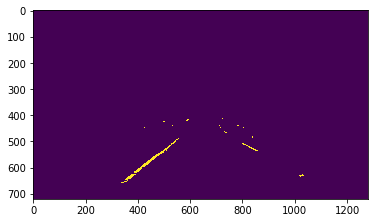

In [35]:
raw_image_2 = mpimg.imread('test_images/test4.jpg')
raw_undist_2 = cv2.undistort(raw_image_2, mtx, dist, None, mtx)

def create_binary2(img):
    #create workign copy
    working_image = np.copy(img)
    imshape = working_image.shape


    #apply RGB threshold
    lower_yellow = np.array([150,150,0])
    upper_yellow = np.array([255,255,130])
    mask_yellow = cv2.inRange(working_image,lower_yellow,upper_yellow)

    lower_white = np.array([200,200,200])
    upper_white = np.array([255,255,255])
    mask_white = cv2.inRange(working_image,lower_white,upper_white)

    combined = mask_yellow + mask_white

    #apply y sobel threshold

    #create and apply mask
    mask = np.zeros_like(combined)
    ignore_mask_color = (255,)*3

    vertices = np.array([[(100,imshape[0]-50),(400, 400), (800, 400), (1200,imshape[0]-50)]], dtype=np.int32)


    cv2.fillPoly(mask, vertices, ignore_mask_color)
    final = cv2.bitwise_and(combined, mask)
    
    return final

plt.imshow(create_binary2(raw_undist_2))